In [2]:
import datetime as dt
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(sys.executable)
print(sys.version)
print("Pandas {pd.__version__}")

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas {pd.__version__}


In [4]:
sys.path.append(str(Path.cwd().parent / 'src'))

In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

In [6]:
import src.EDA as EDA

In [7]:
df = pd.read_csv("../data/realWorldTestData.csv", 
                 low_memory=False, 
                 nrows=1000,
                 )


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   car_nr                         1000 non-null   float64
 1   ref_dt                         1000 non-null   object 
 2   target_event                   1000 non-null   object 
 3   NUM_CONSEC_SERVICES            1000 non-null   int64  
 4   SUM_INVOICE_AMOUNT_IN_SERVICE  1000 non-null   float64
 5   SUM_INVOICE_AMOUNT             1000 non-null   float64
 6   NUM_EVENTS                     1000 non-null   int64  
 7   FIRST_EVT                      1000 non-null   object 
 8   LAST_EVT                       1000 non-null   object 
 9   LAST_MILEAGE                   1000 non-null   float64
 10  MEAN_MILEAGE_PER_MNTH          1000 non-null   float64
 11  AVG_DIFF_MNTH                  1000 non-null   int64  
 12  age_mnth                       1000 non-null   in

In [9]:
EDA.display_distinct_values(df.iloc[:, :10])

,#_distinct_values
Column,
car_nr,999
ref_dt,495
target_event,2
NUM_CONSEC_SERVICES,10
SUM_INVOICE_AMOUNT_IN_SERVICE,47
SUM_INVOICE_AMOUNT,714
NUM_EVENTS,37
FIRST_EVT,727
LAST_EVT,544


In [12]:
EDA.display_value_counts_ptc(df[["CAR_BRAND_UID", "BASE_MARGIN"]])

,counts,pct
VW-PW,560,56.0%
Audi,269,26.9%
SKODA,84,8.4%
SEAT,57,5.7%
VW-NF,30,3.0%


,counts,pct
10.0,413,41.3%
7.0,283,28.3%
12.0,132,13.2%
9.0,127,12.7%
11.25,30,3.0%
8.0,15,1.5%


In [11]:
EDA.display_tail_transposed(df.iloc[:, :10], random_state=None)

(1000, 10)


,217,610,621,190,205
car_nr,1.1e+08,1.1e+08,1.1e+08,1.4e+07,9.2e+07
ref_dt,2017-01-18 00:00:00.0000000,2016-02-01 00:00:00.0000000,2016-05-21 00:00:00.0000000,2016-07-22 00:00:00.0000000,2017-02-12 00:00:00.0000000
target_event,CHURN,CHURN,ACTIVE,ACTIVE,ACTIVE
NUM_CONSEC_SERVICES,5,1,3,3,2
SUM_INVOICE_AMOUNT_IN_SERVICE,0,0,0,0,0
SUM_INVOICE_AMOUNT,5.1e+02,0,7.3e+02,0,1.2e+03
NUM_EVENTS,15,4,17,10,9
FIRST_EVT,2012-07-09 00:00:00.0000000,2012-04-27 00:00:00.0000000,2010-07-08 00:00:00.0000000,2010-11-30 00:00:00.0000000,2011-10-18 00:00:00.0000000
LAST_EVT,2016-05-02 00:00:00.0000000,2014-04-01 00:00:00.0000000,2016-04-04 00:00:00.0000000,2015-02-04 00:00:00.0000000,2016-05-13 00:00:00.0000000
LAST_MILEAGE,9.6e+04,1.5e+04,6.9e+04,6.1e+04,5.4e+04


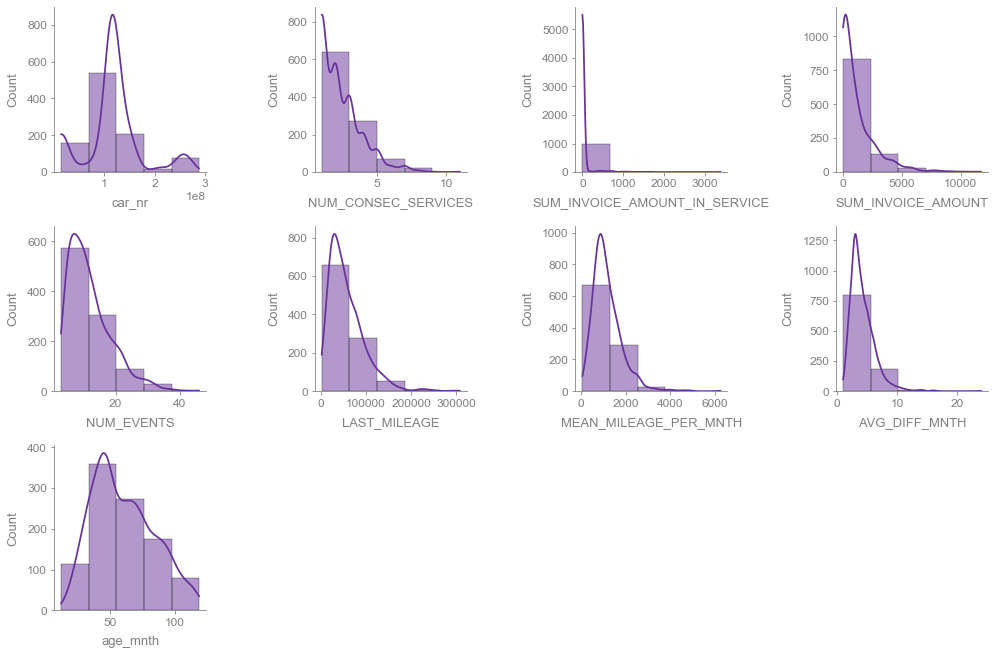

In [50]:
EDA.plot_numerical_hist(df.iloc[:, :15], bins=5, kde=True)

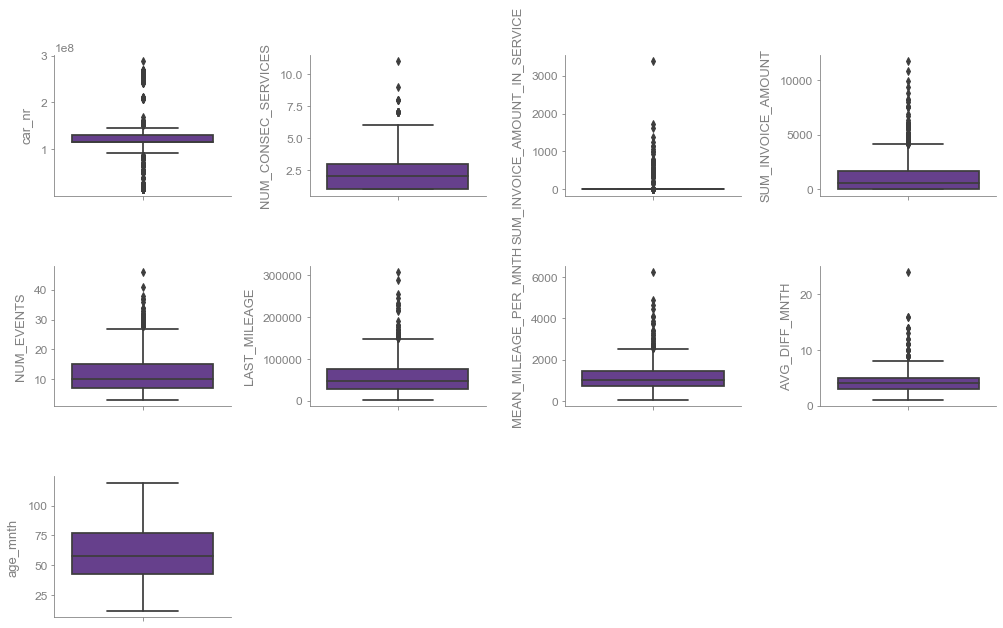

In [29]:
EDA.plot_numerical_box(df.iloc[:, :15])

In [33]:
df_categorical = df.copy()
for col in ["NUM_CONSEC_SERVICES", "NUM_EVENTS", "age_mnth", "FUEL_TYPE_UID", "PARTNER_COMPANY_NR"]:
    df_categorical[col] = df_categorical[col].astype("category")

"Not plotted: ['NUM_EVENTS', 'age_mnth']"

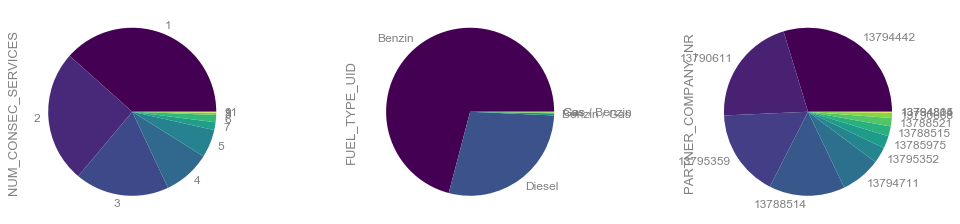

In [51]:
EDA.plot_categorical_pies(df_categorical)

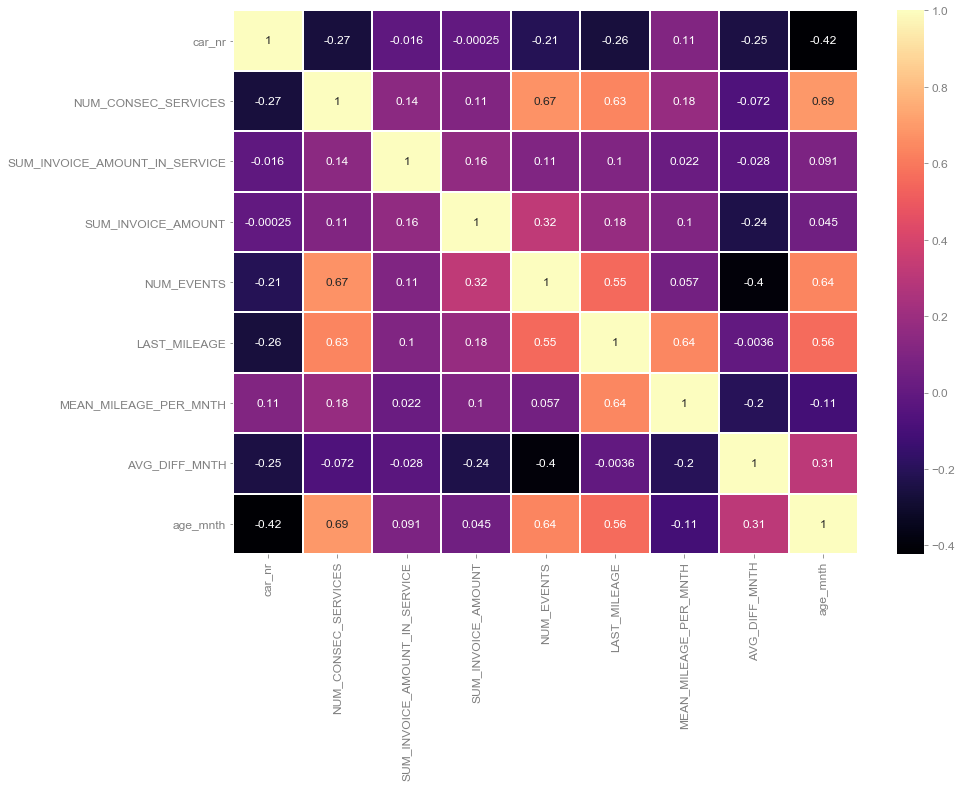

In [55]:
EDA.plot_correlations_full_heatmap(df.iloc[:, :15])